In [1]:
#### Load the libraries 
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

pd.options.mode.chained_assignment = None 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Read in the data

In [2]:
# data from Australian team

sydney = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Sydney deals') # Sydney sheet

melbourne = pd.read_excel('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Sydney and Melbourne deals - July 2021.xlsx'
                       , 'Melbourne CBD deals') # Melbourne sheet

In [3]:
#sydney.head()

In [4]:
# remove non-columns from the datasets
sydney = sydney.loc[:,~sydney.columns.str.contains('Unnamed')] 
melbourne = melbourne.loc[:,~melbourne.columns.str.contains('Unnamed')] 

In [5]:
# compare column names, Sale Date vs Date
sydney.columns
melbourne.columns

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Building Name',
       'Address', 'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area',
       '$/m²', 'Core Market Yield', 'Passing Yield', 'Purchaser', 'WALE',
       'Occupancy', 'NABERS Energy rating (Base Building) Current rating',
       'Current Expiry', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

Index(['Grade', 'Prime/Secondary', 'Sold (%)', 'Date', 'Address', 'Suburb',
       'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²', 'WALE',
       'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished'],
      dtype='object')

In [6]:
melbourne=melbourne.rename(columns = {'Date':'Sale Date'}) # rename

In [7]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs

In [8]:
# look at Market and Suburb. we'll need another column for city
df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])

,count
Market,
CBD,258
Fringe,12
North Shore,58
Parramatta,30
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,7
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,43


In [9]:
# create City column
sydney['City'] = 'Sydney'
melbourne['City'] = 'Melbourne'

In [10]:
df = sydney.append(melbourne, ignore_index=True) # combine the two dfs again

In [11]:
# only keep these columns
df = df[['Grade', 'Prime/Secondary', 'Sold (%)', 'Sale Date', 'Address', 'City',
       'Suburb', 'Market', 'Postcode', 'States', 'Price', 'Area', '$/m²',
       'WALE', 'Occupancy', 'NABERS at time of Sale', 'Floors', 'Year Built',
       'Year refurbished']]

### Scrape the building coordinates

- the below section scrape Google Maps to get building coordinates based on Address Postcode and Suburb
- having run it through once, I've commented them out, not to do this over again
- due to the pause between loop iterations, the loop runs for around 6sec * ~350 observations = ~ 35 minutes

In [12]:
# get selenium
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException, TimeoutException # Exceptions
# import time

#### Initiate the browser, and remove the terms and agreements pop up

In [13]:
# chrome_browser = webdriver.Chrome(executable_path=r"C:\Users\Sleptcom\Script\chromedriver.exe") # instantiate the browser

# # we will just go to this first random google maps link in order to "click" on the Agree button, after which we can proceed to the loop
# link ='https://www.google.com/maps/place/34+Hunter+St,+Sydney+NSW+2000,+Australia'
# # navigate to the link
# chrome_browser.get(link)
# # wait a bit
# time.sleep(5)
# #chrome_browser.switch_to_frame(0) # this ended up being unnecessary, but before you needed it
# chrome_browser.find_element(By.XPATH,'/html/body/c-wiz/div/div/div/div[2]/div[1]/div[4]/form/div[1]/div/button').click() # finds anf click button
# chrome_browser.switch_to.default_content()

#### Loop through addresses and get coordinates

In [14]:
# df['Address_scrape'] =  df['Address'].replace(' ', '+')

# #staring the loop
# for index, row in df.iterrows():
#     #print(df.head(10))
#     try:
#         #create link from the address and typical link structure
#         link ='https://www.google.com/maps/search/' + row['Address_scrape'] + '+' + row['Suburb'] + '+' + str(row['Postcode']) + '+' + row['States']
        
#         # navigate to the link
#         chrome_browser.get(link)
        
#         # give time to load + avoid recognition of robotic page access
#         time.sleep(6)
        
#         url = chrome_browser.current_url
        
#         #print(url.index('@'))
#         #print(url.index('z/'))
#         both_coords = url[url.index('@-')+1:url.index('17z/')-1] # grabs both coords with a comma in between
        
#         # split based on a comma and put into a new var
#         df.at[index, 'lat'] = both_coords[:both_coords.index(',')] 
#         df.at[index, 'long'] = both_coords[both_coords.index(',')+1:]
        
#         print(index)
    
#     except NoSuchElementException:
#         continue
#     except TimeoutException:
#         continue
#     except:
#         continue
        
# df.to_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv', index=False)

In [15]:
# instead of running the loop, open the file saved at the end of the loop

df = pd.read_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\df_coords.csv')

In [16]:
df.head()

,Grade,Prime/Secondary,Sold (%),Sale Date,Address,City,Suburb,Market,Postcode,States,Price,Area,$/m²,WALE,Occupancy,NABERS at time of Sale,Floors,Year Built,Year refurbished,Address_scrape,lat,long
0,B,Secondary,1.0,01/02/2007,34 Hunter Street,Sydney,Sydney,CBD,2000,NSW,41.000,5435.0,7544.0,1.8,0.70,Not rated,12,1960,NaN,34 Hunter Street,-33.865406,151.208427
1,B,Secondary,1.0,01/03/2007,91 York Street,Sydney,Sydney,CBD,2000,NSW,20.195,5567.0,3627.0,2.9,0.99,Not rated,13,1988,NaN,91 York Street,-33.869785,151.205827
2,B,Secondary,1.0,01/06/2007,89 York Street,Sydney,Sydney,CBD,2000,NSW,24.000,5624.0,4267.0,1.2,0.91,Not rated,12,1970,NaN,89 York Street,-33.869648,151.205918
3,B,Secondary,1.0,01/08/2007,99 Elizabeth Street,Sydney,Sydney,CBD,2000,NSW,76.500,8447.0,9027.0,1.4,0.95,Not rated,18,1969,NaN,99 Elizabeth Street,-33.869317,151.210132
4,B,Secondary,1.0,01/10/2007,10 Barrack Street,Sydney,Sydney,CBD,2000,NSW,82.500,9556.0,8633.0,3.8,1.00,Not rated,12,1986,2016,10 Barrack Street,-33.867379,151.206246


In [17]:
# there are five rows for which coords couldn't be found, I manually fixed them in the csv
#df[df['lat'].isnull()]

#### Output coordinates

In [18]:
# create id
df.insert(0, 'ID', range(1,1 + len(df)))

In [19]:
coords = df[['ID', 'lat', 'long']]

In [20]:
#coords.to_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\coords.csv', index=False)

### Variable creation / modification

In [21]:
#df.head(50)

In [22]:
# look again at the datatypes we work with, we are looking to transform the variables of interest from
# object to numerical or categorical data
df.dtypes

ID                          int32
Grade                      object
Prime/Secondary            object
Sold (%)                  float64
Sale Date                  object
Address                    object
City                       object
Suburb                     object
Market                     object
Postcode                    int64
States                     object
Price                     float64
Area                      float64
$/m²                      float64
WALE                      float64
Occupancy                 float64
NABERS at time of Sale     object
Floors                      int64
Year Built                  int64
Year refurbished           object
Address_scrape             object
lat                       float64
long                      float64
dtype: object

I also like to look at the data itself. Below I will be looking at different vars and their value counts

#### Age

In [23]:
# count of observations by refurbishment year
# we can see there's one string value
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981,2
1982,1
1985,1
1986,2
1989,1
1990,1
1991,1
1993,2
1995,5


In [24]:
# replace string value with NA
df['Year refurbished'] = df['Year refurbished'].replace('demolshed for metro ', np.NaN)

In [25]:
# convert to numeric
df['Year refurbished'] = pd.to_numeric(df['Year refurbished'])

In [26]:
# look again
# now it looks ok
df['Address'].groupby(df['Year refurbished']).agg(['count'])

,count
Year refurbished,
1981.0,2
1982.0,1
1985.0,1
1986.0,2
1989.0,1
1990.0,1
1991.0,1
1993.0,2
1995.0,5


In [27]:
df['Sale Year'] = pd.DatetimeIndex(df['Sale Date']).year # get year of sale date

# create Age as years from refurbishment, if refurbished, otherwise from construction date
df['Age'] = np.where(df['Sale Year'] >= df['Year refurbished'], 
                     df['Sale Year'] - df['Year refurbished'] + 1 , 
                     df['Sale Year'] - df['Year Built'] + 1 )  

In [28]:
df = df[df['Age']>-5] # following Ben's advise, removing only Age -10, -7, -6 and -5

In [29]:
# create the dummy for properties bought during development stage
df['Fund_through_deals'] = np.where(df['Age'] <=0, 1, 0)

# define as a category
df['Fund_through_deals'] = df['Fund_through_deals'].astype("category")

In [30]:
# then replace to be the youngest age, 1 year
df['Age'] = np.where(df['Age'] <=0, 1, df['Age'])

In [31]:
# create Age category
df['Age_cat'] = (df['Age']/10).apply(np.ceil)

In [32]:
# look what categories there are, in the previous models , last category was everything above 59 , but here will have to be everything above 49
df['Address'].groupby(df['Age_cat']).agg(['count'])

,count
Age_cat,
1.0,172
2.0,94
3.0,52
4.0,16
5.0,13
6.0,2
8.0,4
11.0,2
13.0,1


In [33]:
# put everything above 49 in the same category
df['Age_cat'] = np.where(df['Age_cat'] >=6, 6, df['Age_cat'])

In [34]:
# looks ok
df['Address'].groupby(df['Age_cat']).agg(['count'])

,count
Age_cat,
1.0,172
2.0,94
3.0,52
4.0,16
5.0,13
6.0,9


In [35]:
# define as a category
df['Age_cat'] = df['Age_cat'].astype("category")

#### Sale Year

In [36]:
# also let's not forget Sale Year as Time FE
df['Sale_year_cat'] = df['Sale Year'].astype("category")

In [37]:
df['Address'].groupby(df['Sale_year_cat']).agg(['count'])

,count
Sale_year_cat,
2007,5
2008,2
2009,7
2010,10
2011,21
2012,23
2013,44
2014,46
2015,27


In [38]:
# removing early years with few obs
df = df[df['Sale Year'] >=2010]

# redefine the categories
df['Sale_year_cat'] = df['Sale_year_cat'].cat.remove_unused_categories()

#### Quality

In [39]:
# check the quality types and their breakdown
df['Address'].groupby(df['Grade']).agg(['count'])
df['Address'].groupby(df['Prime/Secondary']).agg(['count'])

# crosstab between two grade groups
pd.crosstab(index=df['Grade'], columns = df['Prime/Secondary'])

,count
Grade,
A,147
B,166
C,4
D,1
Premium,24


,count
Prime/Secondary,
Prime,172
Secondary,170


Prime/Secondary,Prime,Secondary
Grade,,
A,147,0
B,1,165
C,0,4
D,0,1
Premium,24,0


In [40]:
# encode grade, ordered
grade_category = CategoricalDtype(categories=['D', 'C', 'B', 'A', 'Premium'], ordered=True)
df['Grade_cat'] = df['Grade'].astype(grade_category)

# encode Prime/Secondary, ordered
grade_category2 = CategoricalDtype(categories=['Secondary', 'Prime'], ordered=True)
df['Grade_cat2'] = df['Prime/Secondary'].astype(grade_category2)

In [41]:
# describe only covers numberical data, not categories
df.describe()

,ID,Sold (%),Postcode,Price,Area,$/m²,WALE,Occupancy,Floors,Year Built,Year refurbished,lat,long,Sale Year,Age
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,233.000000,342.000000,342.000000,342.000000,342.000000
mean,187.827485,0.884685,2195.885965,163.912286,20157.260587,10025.547590,4.593041,0.923978,17.666667,1982.388889,2009.111588,-34.525530,150.125734,2015.520468,15.020468
std,99.640716,0.231384,367.304793,175.112678,17612.228900,5345.143092,3.687784,0.165580,11.391462,26.532074,7.795638,1.489283,2.339405,2.847727,15.809056
min,16.000000,0.150000,2000.000000,10.200000,1151.000000,2123.000000,0.000000,0.000000,2.000000,1876.000000,1981.000000,-37.822453,144.941826,2010.000000,1.000000
25%,101.250000,1.000000,2000.000000,52.042500,7609.250000,5974.251895,2.500000,0.915250,10.000000,1974.000000,2005.000000,-33.875446,151.008416,2013.000000,5.000000
50%,188.500000,1.000000,2000.000000,104.250000,14891.400000,8623.357990,3.500000,0.982000,15.000000,1987.500000,2010.000000,-33.866659,151.205223,2015.500000,11.000000
75%,273.750000,1.000000,2150.000000,228.375000,27639.975000,12916.018525,5.200000,1.000000,23.000000,1994.750000,2015.000000,-33.840658,151.208436,2018.000000,20.000000
max,359.000000,1.000000,3008.000000,1520.000000,92243.000000,30000.000000,33.000000,1.000000,64.000000,2022.000000,2020.000000,-33.778426,151.225813,2021.000000,130.000000


#### Market - Suburb

In [42]:
# look at various counts and cross-tabs to understand what's where

df['Address'].groupby(df['Market']).agg(['count'])
df['Address'].groupby(df['Suburb']).agg(['count'])
df['Address'].groupby(df['States']).agg(['count'])


pd.crosstab(index=df['Market'], columns = df['City'])
pd.crosstab(index=df['Suburb'], columns = df['Market'])
pd.crosstab(index=df['States'], columns = df['City'])
pd.crosstab(index=df['Suburb'], columns = df['States'])

# very low count in some suburbs
# also there's only one record in the 'Suburban' Market

,count
Market,
CBD,242
Fringe,11
North Shore,58
Parramatta,30
Suburban,1


,count
Suburb,
Alexandria,1
Chatswood,7
Chippendale,1
Docklands,7
Eveleigh,1
Kensington,1
Macquarie Park,11
Mascot,1
Melbourne,43


,count
States,
MSW,1
NSW,283
VIC,58


City,Melbourne,Sydney
Market,,
CBD,58,184
Fringe,0,11
North Shore,0,58
Parramatta,0,30
Suburban,0,1


Market,CBD,Fringe,North Shore,Parramatta,Suburban
Suburb,,,,,
Alexandria,0,1,0,0,0
Chatswood,0,0,7,0,0
Chippendale,0,1,0,0,0
Docklands,7,0,0,0,0
Eveleigh,0,1,0,0,0
Kensington,0,1,0,0,0
Macquarie Park,0,0,11,0,0
Mascot,0,1,0,0,0
Melbourne,43,0,0,0,0


City,Melbourne,Sydney
States,,
MSW,0,1
NSW,0,283
VIC,58,0


States,MSW,NSW,VIC
Suburb,,,
Alexandria,0,1,0
Chatswood,0,7,0
Chippendale,0,1,0
Docklands,0,0,7
Eveleigh,0,1,0
Kensington,0,1,0
Macquarie Park,0,11,0
Mascot,0,1,0
Melbourne,0,0,43


In [43]:
melbourne['Address'].groupby(melbourne['Market']).agg(['count']) 

# The only Market in Melbourne is CBD. it's tricky - should we separate Melbourne CBD and Sydney CBD?
# for now I have encoded them separately

,count
Market,
CBD,58


In [44]:
# encoding the market, separating Melbourne and Sydney CBD

df['Market'] = np.where((df['City'] == "Sydney") & (df['Market']=='CBD'), 
                     "Sydney CBD",
                       np.where((df['City'] == "Melbourne") & (df['Market']=='CBD'), "Melbourne CBD", df['Market'] ))  

In [45]:
# creating categories for City and Marekt
df['City_cat'] = df["City"].astype("category")
df['Market_cat'] = df["Market"].astype("category")

#### NABERS rating

In [46]:
df = df.rename(columns = {'NABERS at time of Sale':'NABERS'}) # rename

In [47]:
# look at NABERS breakdown. Is Not Rated the same as 0? 
df['Address'].groupby(df['NABERS']).agg(['count'])

,count
NABERS,
0,1
1,2
1.5,5
2,18
2.5,8
3,19
3.5,41
4,49
4.5,56


In [48]:
# fix the values
df['NABERS'] = df['NABERS'].replace('Not Rated', 'Not rated')
df['NABERS'] = df['NABERS'].replace('Not rated', "0")

#convert to numeric first
df['NABERS'] = pd.to_numeric(df['NABERS'])

# look again , looks ok . Only one 6 record
df['Address'].groupby(df['NABERS']).agg(['count'])
#df.dtypes

,count
NABERS,
0.0,51
1.0,2
1.5,5
2.0,18
2.5,8
3.0,19
3.5,41
4.0,49
4.5,56


- we have to decide how to group NABERS
- is 0 and not rated the same?
- Option 1: use as continous. I would not use it as categorical as is (with half scores), because some of the grades and half grades have very few obs
- Option 2: group to into "whole" numbers, like 1 and 1.5, 2 and 2.5 etc. However, there's only one 6. Plus, half grades beyond three already have sufficient observations
- Option 3: group the grades more broadly based on this https://www.nabers.gov.au/about/what-nabers or on this "There are enough transactions with NABERS ratings in the range from 3 – 5 as these are the most common scores but few buildings have the very top ratings of 5.5 or 6.0 or the bottom ratings under 3.0 so we will not have 60+ transactions the top and bottom ends of the scale" - so it would be "under 3", "3 to 5", "above 5"
- Option 4: from last Ben's email: 'To my mind, what we’re looking for is slightly higher building values associated with NABERS ratings of 5.0 or higher, and slightly lower for 3.5 and below'

In [49]:
# Category verion 1
df['NABERS_cat1'] = df['NABERS'].replace(dict.fromkeys([1,1.5], 1))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([2,2.5], 2))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([3,3.5], 3))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([4,4.5], 4))
df['NABERS_cat1'] = df['NABERS_cat1'].replace(dict.fromkeys([5,5.5,6], 5))

# Category version 2

df['NABERS_cat2'] = df['NABERS'].replace(dict.fromkeys([1,1.5,2,2.5], 1))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([3,3.5,4,4.5,5], 2))
df['NABERS_cat2'] = df['NABERS_cat2'].replace(dict.fromkeys([5.5,6], 3))

# Category version 3

df['NABERS_cat3'] = df['NABERS'].replace(dict.fromkeys([1,1.5,2,2.5,3, 3.5], 1))
df['NABERS_cat3'] = df['NABERS_cat3'].replace(dict.fromkeys([4,4.5], 2))
df['NABERS_cat3'] = df['NABERS_cat3'].replace(dict.fromkeys([5,5.5,6], 3))

In [50]:
# encode all the categories

df['NABERS_cat1'] = df['NABERS_cat1'].astype("category")
df['NABERS_cat2'] = df['NABERS_cat2'].astype("category")
df['NABERS_cat3'] = df['NABERS_cat3'].astype("category")

In [51]:
pd.crosstab(index=df['Sale Year'], columns = df['NABERS_cat3'])

NABERS_cat3,0.0,1.0,2.0,3.0
Sale Year,,,,
2010,1,5,2,2
2011,5,10,4,2
2012,9,8,4,2
2013,11,13,13,7
2014,6,7,18,15
2015,3,10,10,4
2016,3,6,9,5
2017,2,14,14,12
2018,7,8,14,16


#### Vacancy

In [52]:
# create vacancy from occupancy
df['vacancy'] = 1 - df['Occupancy']

#### Distance to shore and station

In [53]:
dist = pd.read_csv('G:\\29 Data Analytics\\Commercial research projects\\MS\\ESG project\\Australia\\Coords_MatchedtoShoreandStation.csv')

In [54]:
dist.head()

,ID,lat,long,DistanceKilometers,Sydney train stations,FindNearestRank,DistanceKilometers2
0,1,-33.865406,151.208427,0.502577,Wynyard,1,0.269051
1,2,-33.869785,151.205827,0.324575,Town Hall,1,0.397293
2,3,-33.869648,151.205918,0.336109,Wynyard,1,0.406489
3,4,-33.869317,151.210132,0.724688,St James,1,0.155690
4,5,-33.867379,151.206246,0.454198,Wynyard,1,0.164435


In [55]:
dist = dist[['ID', 'DistanceKilometers', 'DistanceKilometers2']]

In [56]:
dist = dist.rename(columns = {'DistanceKilometers':'Dist_to_shore', 'DistanceKilometers2':'Dist_to_station'})

In [57]:
# join on id
df = pd.merge(df, dist, how="left", on="ID")

### Visualising vars

#### Continuous vars

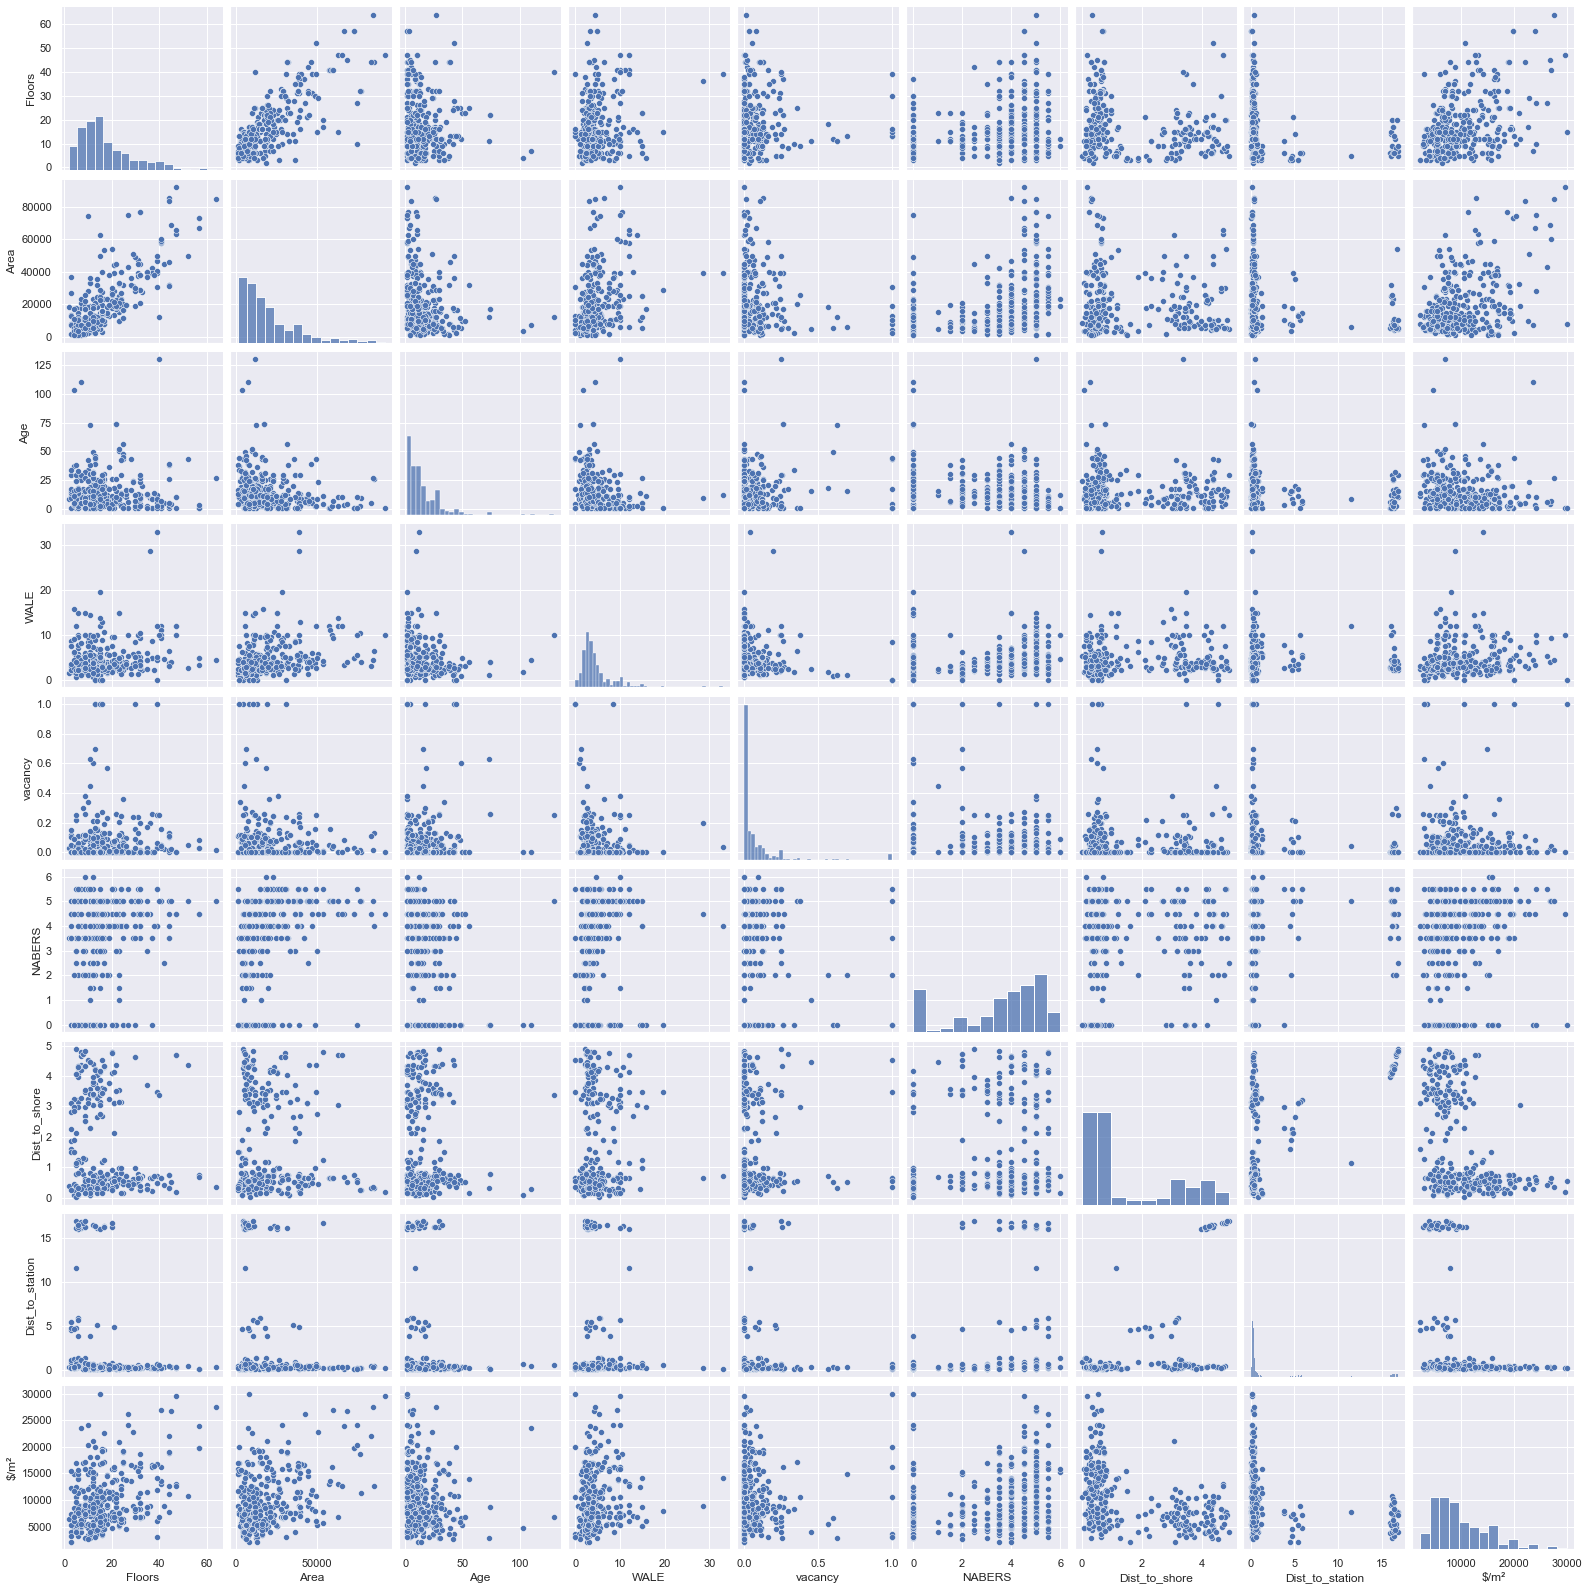

In [58]:
#scatterplot
sns.set()
cols = ['Floors', 'Area', 'Age', 'WALE', 'vacancy', 'NABERS', 'Dist_to_shore', 'Dist_to_station', '$/m²']
sns.pairplot(df[cols], height = 2.5)
plt.show()

some vars might need transformation, let's look at the histograms

array([[<AxesSubplot:title={'center':'Floors'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'WALE'}>,
        <AxesSubplot:title={'center':'vacancy'}>,
        <AxesSubplot:title={'center':'NABERS'}>],
       [<AxesSubplot:title={'center':'Dist_to_shore'}>,
        <AxesSubplot:title={'center':'Dist_to_station'}>,
        <AxesSubplot:title={'center':'$/m²'}>]], dtype=object)

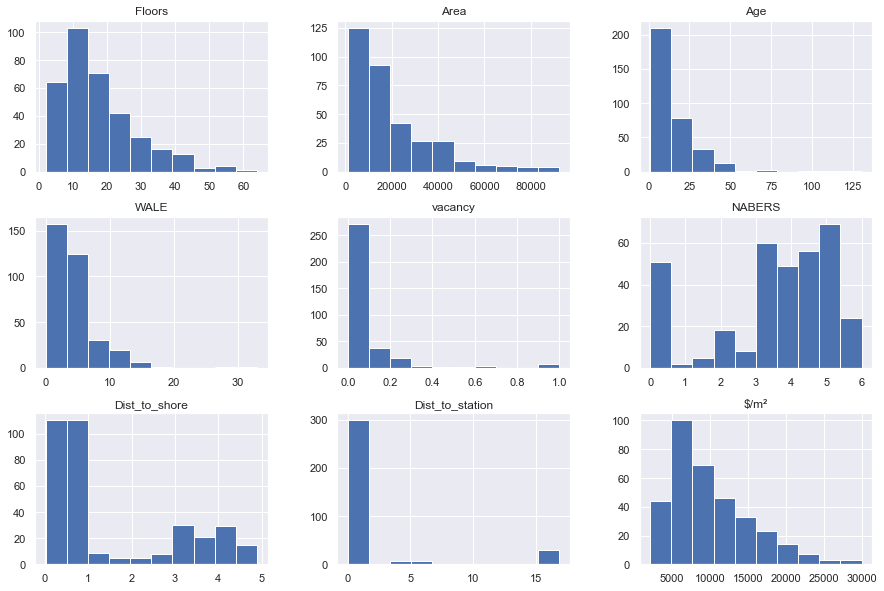

In [59]:
df[cols].hist(figsize=(15, 10))

In [60]:
#(df.sort_values(by=['Occupancy'])).head(50)

- we need to log transform most of the vars
- Occupancy/ vacancy - can't find the right functional form
- Adding a small amount to zero WALEs made the distribution resemble normal

In [61]:
df['WALE_transf'] = df['WALE'].replace(0, 0.3)
#df['Occupancy_transf'] = df['Occupancy'].replace(0, 0.01)

In [62]:
cols2 = ['Floors', 'Area', 'Age', 'WALE_transf', 'Dist_to_shore', 'Dist_to_station', '$/m²']

# take logarithms of vars
logged_vars = np.log(df[cols2])
#add prefix to var names
logged_vars = logged_vars.add_prefix('ln_')

array([[<AxesSubplot:title={'center':'ln_Floors'}>,
        <AxesSubplot:title={'center':'ln_Area'}>,
        <AxesSubplot:title={'center':'ln_Age'}>],
       [<AxesSubplot:title={'center':'ln_WALE_transf'}>,
        <AxesSubplot:title={'center':'ln_Dist_to_shore'}>,
        <AxesSubplot:title={'center':'ln_Dist_to_station'}>],
       [<AxesSubplot:title={'center':'ln_$/m²'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

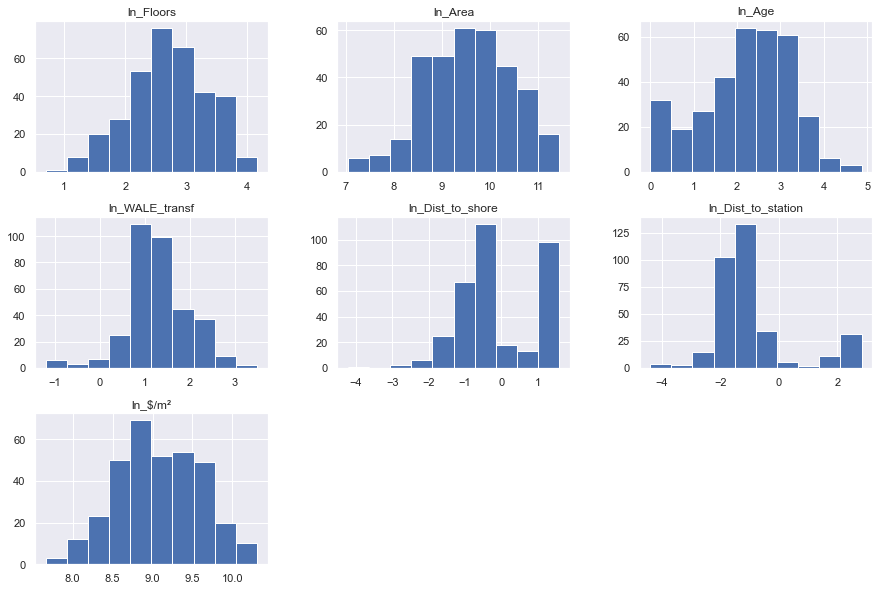

In [63]:
logged_vars.hist(figsize=(15, 10))

In [64]:
# add logged vars back to the dataset
df = pd.concat([df, logged_vars], axis=1)

#### Categorical vars

##### Grade

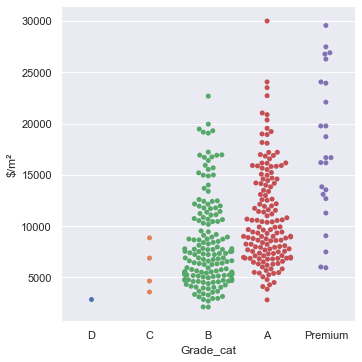

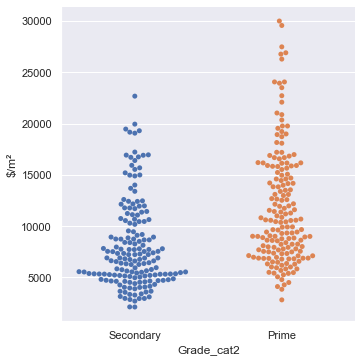

In [65]:
# scatterplots of Grade
sns.catplot(x="Grade_cat", y="$/m²", kind="swarm", data=df)
sns.catplot(x="Grade_cat2", y="$/m²", kind="swarm", data=df)

##### NABERS

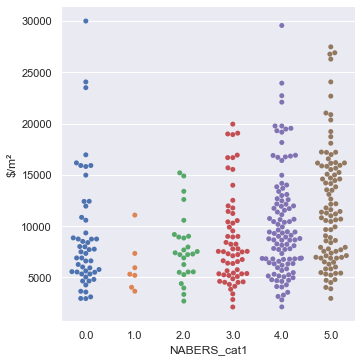

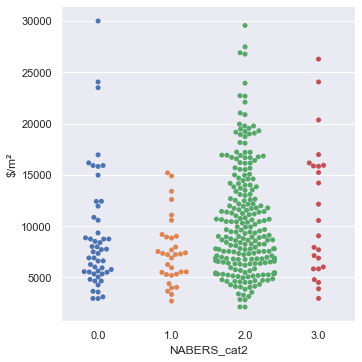

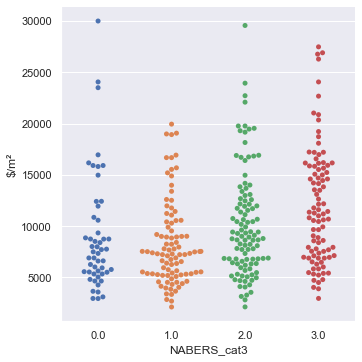

In [66]:
# sctterplots of different NABERS categorisations
sns.catplot(x="NABERS_cat1", y="$/m²", kind="swarm", data=df)
sns.catplot(x="NABERS_cat2", y="$/m²", kind="swarm", data=df)
sns.catplot(x="NABERS_cat3", y="$/m²", kind="swarm", data=df)

it does look like the last graph (NABERS_cat3) looks like the most gradual increase. Just there's one outlier in non-graded data. 

##### City and Market

[Text(0, 0, 'Fringe'),
 Text(1, 0, 'Melbourne CBD'),
 Text(2, 0, 'North Shore'),
 Text(3, 0, 'Parramatta'),
 Text(4, 0, 'Suburban'),
 Text(5, 0, 'Sydney CBD')]

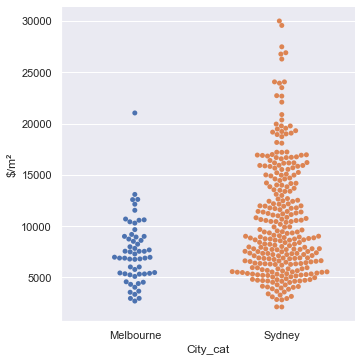

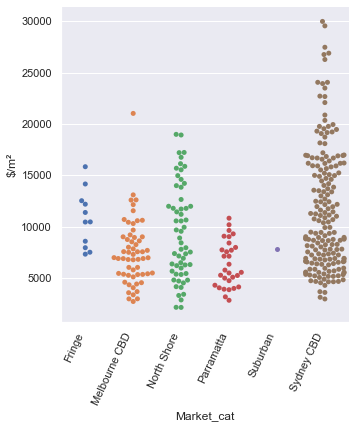

In [67]:
# looking at City and Market categories. 

sns.catplot(x="City_cat", y="$/m²", kind="swarm", data=df)

ax = sns.catplot(x="Market_cat", y="$/m²", kind="swarm", data=df)
for axes in ax.axes.flat: axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

- There is one apparent outlier in Melbourne
- However, it is not the zero NABERS rated buildings from NABERS category graphs
- Perhaps it is worth deleting it, but not sure yet
- But i will delete the Suburban market, and will delete NABERS outlier

In [68]:
# removing NABERS outlier
df = df[~((df['NABERS'] ==0) & (df['$/m²'] > 20000)) ]

In [69]:
# removing Suburban
df = df[~(df['Market_cat'] =='Suburban' ) ]

# since Suburban was a category, remove the category as it no longer exists
df['Market_cat'] = df['Market_cat'].cat.remove_unused_categories()

visualise again to make sure it's deleted

[Text(0, 0, 'Fringe'),
 Text(1, 0, 'Melbourne CBD'),
 Text(2, 0, 'North Shore'),
 Text(3, 0, 'Parramatta'),
 Text(4, 0, 'Sydney CBD')]

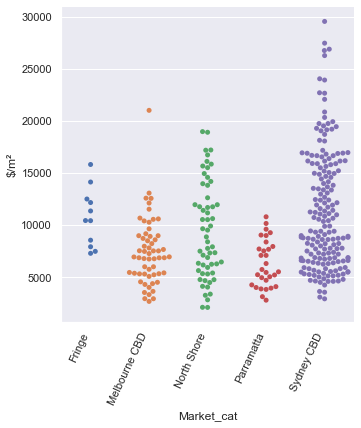

In [70]:
ax = sns.catplot(x="Market_cat", y="$/m²", kind="swarm", data=df)
for axes in ax.axes.flat: axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

##### Year

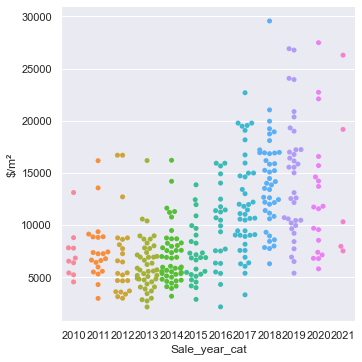

In [71]:
sns.catplot(x="Sale_year_cat", y="$/m²", kind="swarm", data=df)

In [72]:
df.dtypes

ID                       int32
Grade                   object
Prime/Secondary         object
Sold (%)               float64
Sale Date               object
Address                 object
City                    object
Suburb                  object
Market                  object
Postcode                 int64
States                  object
Price                  float64
Area                   float64
$/m²                   float64
WALE                   float64
Occupancy              float64
NABERS                 float64
Floors                   int64
Year Built               int64
Year refurbished       float64
Address_scrape          object
lat                    float64
long                   float64
Sale Year                int64
Age                    float64
Fund_through_deals    category
Age_cat               category
Sale_year_cat         category
Grade_cat             category
Grade_cat2            category
City_cat              category
Market_cat            category
NABERS_c

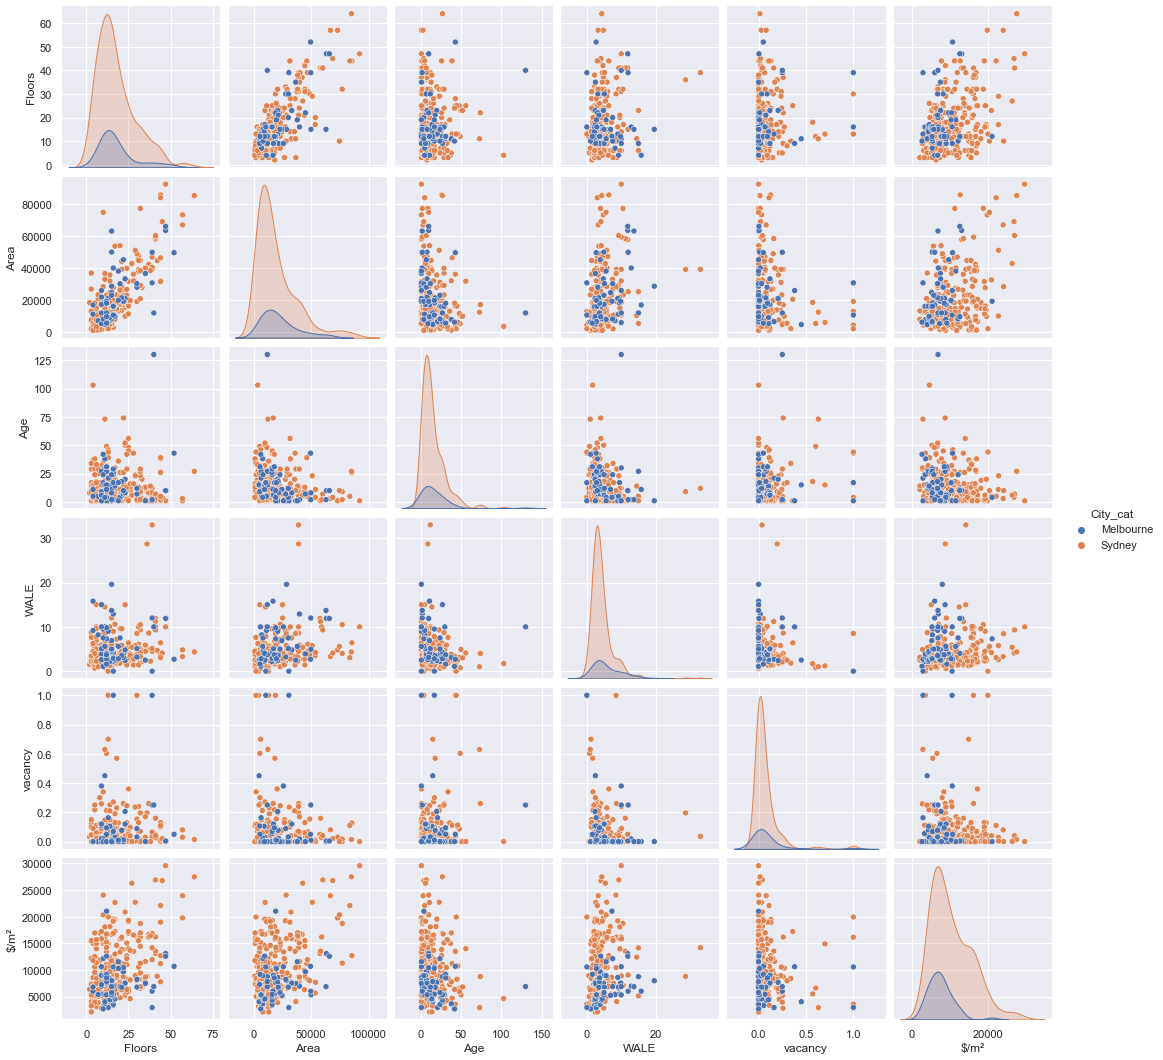

In [73]:
df_for_pairplots = df[['Floors', 'Area', 'Age', 'WALE', 'vacancy', 'City_cat', '$/m²']]
sns.pairplot(df_for_pairplots, hue='City_cat')

### Estimation

In [74]:
from statsmodels.tsa import stattools
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [75]:
df = df.rename(columns={'ln_$/m²': 'ln_price_psm'})

In [76]:
hedonic_model = sm.OLS.from_formula(formula='ln_price_psm ~ ln_Floors +ln_Area + Age_cat + Fund_through_deals + Grade_cat2 + NABERS_cat3 + City_cat + \
ln_WALE_transf + Market_cat + Sale_year_cat + ln_Dist_to_shore + ln_Dist_to_station' 
                                    ,data = df).fit()
print(hedonic_model.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_price_psm   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     36.47
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.81e-83
Time:                        23:45:34   Log-Likelihood:                 2.0082
No. Observations:                 338   AIC:                             57.98
Df Residuals:                     307   BIC:                             176.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [77]:
y = df['ln_price_psm'].values

In [78]:
X = df[['ln_Floors', 'ln_Area', 'ln_Age']].values

In [79]:
X = sm.add_constant(X)

In [80]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     21.44
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.01e-12
Time:                        23:45:34   Log-Likelihood:                -224.79
No. Observations:                 338   AIC:                             457.6
Df Residuals:                     334   BIC:                             472.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5093      0.336     25.346      0.0